C:\Users\USER\AppData\Local\Temp\ipykernel_29140\3436681536.py:35: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in colors]


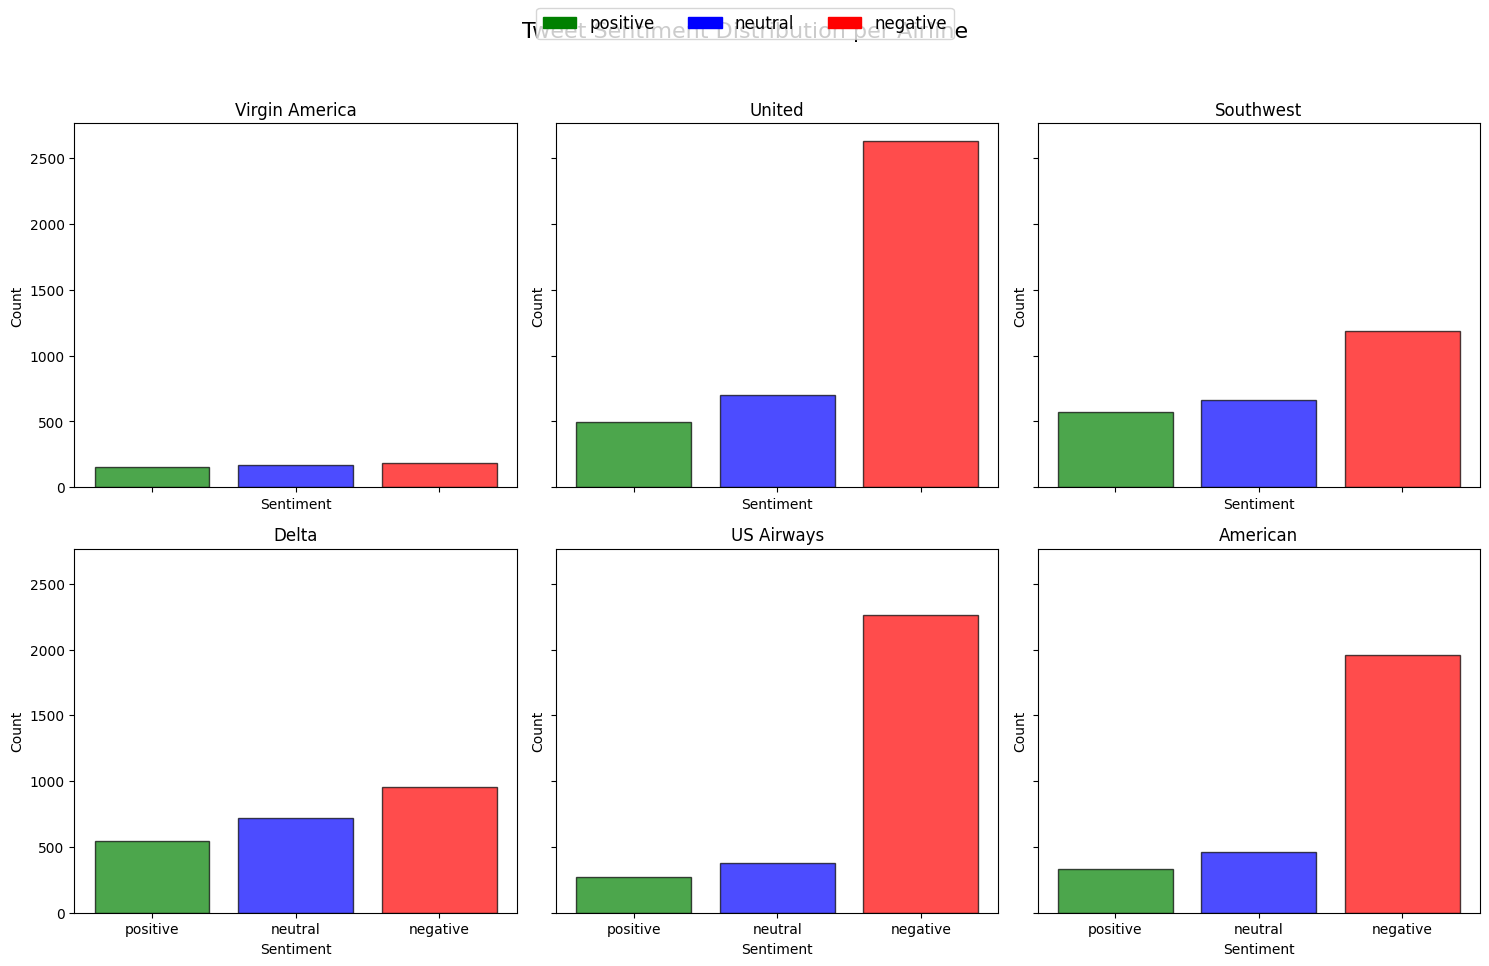

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset and list the columns
file_path = './Tweets.csv'
# Load only the relevant columns for the analysis
relevant_columns = ['airline', 'airline_sentiment', 'negativereason', 'text']
tweets_data = pd.read_csv(file_path, usecols=relevant_columns)

# Prepare the data for plotting
airlines = tweets_data['airline'].unique()
sentiments = ['positive', 'neutral', 'negative']

# Set up the grid for the plots
fig, axes = plt.subplots(2, 3, figsize=(15, 10), sharey=True, sharex=True)
colors = ['green', 'blue', 'red']

# Plot sentiment distribution for each airline
for i, airline in enumerate(airlines):
    ax = axes[i // 3, i % 3]
    airline_data = tweets_data[tweets_data['airline'] == airline]
    sentiment_counts = airline_data['airline_sentiment'].value_counts()
    
    # Ensure the order of sentiments is consistent
    sentiment_counts = sentiment_counts.reindex(sentiments, fill_value=0)
    
    ax.bar(sentiments, sentiment_counts, color=colors, edgecolor='black', alpha=0.7)
    ax.set_title(airline, fontsize=12)
    ax.set_xlabel('Sentiment', fontsize=10)
    ax.set_ylabel('Count', fontsize=10)

# Adjust layout and add a global legend
fig.suptitle('Tweet Sentiment Distribution per Airline', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.95])
handles = [plt.Rectangle((0, 0), 1, 1, color=color, edgecolor='black') for color in colors]
fig.legend(handles, sentiments, loc='upper center', ncol=3, fontsize=12)
plt.show()
